In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

img_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)

main_dir = '/content/gdrive/My Drive/krushimitra_be/disease_data/disease_data'

train_dataset = img_generator.flow_from_directory(batch_size=32,
                                                  directory=main_dir,
                                                  shuffle=True,
                                                  target_size=(256,256),
                                                  subset="training",
                                                  class_mode='categorical')

validation_dataset = img_generator.flow_from_directory(batch_size=32,
                                                  directory=main_dir,
                                                  shuffle=True,
                                                  target_size=(256,256),
                                                  subset="validation",
                                                  class_mode='categorical')


Found 3352 images belonging to 4 classes.
Found 836 images belonging to 4 classes.


In [ ]:
print(train_dataset.class_indices)

{'Blight': 0, 'Common_Rust': 1, 'Gray_Leaf_Spot': 2, 'Healthy': 3}


In [ ]:
classes = ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

In [ ]:
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(256,256,3))

#vgg_model.build(input_shape=(256,256,3))

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
print(vgg_model.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [ ]:
from keras.layers import Input, Flatten, Dense, Activation, Dropout
from keras.models import  Sequential

model = Sequential()

model.add(vgg_model)
model.add(Flatten())
model.add(Dense(4))
model.add((Activation('softmax')))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(train_dataset, validation_data=validation_dataset, epochs=10)


Epoch 1/10
105/105 [==============================] - 1107s 10s/step - loss: 2.2801 - accuracy: 0.2737 - val_loss: 1.3472 - val_accuracy: 0.4199
Epoch 2/10
105/105 [==============================] - 53s 505ms/step - loss: 1.3461 - accuracy: 0.3092 - val_loss: 0.4414 - val_accuracy: 0.8134
Epoch 3/10
105/105 [==============================] - 54s 516ms/step - loss: 0.6078 - accuracy: 0.7672 - val_loss: 0.3644 - val_accuracy: 0.8278
Epoch 4/10
105/105 [==============================] - 55s 523ms/step - loss: 0.3850 - accuracy: 0.8329 - val_loss: 0.2832 - val_accuracy: 0.8684
Epoch 5/10
105/105 [==============================] - 55s 525ms/step - loss: 0.3805 - accuracy: 0.8405 - val_loss: 0.3211 - val_accuracy: 0.8696
Epoch 6/10
105/105 [==============================] - 56s 530ms/step - loss: 0.3612 - accuracy: 0.8497 - val_loss: 0.2669 - val_accuracy: 0.8828
Epoch 7/10
105/105 [==============================] - 56s 528ms/step - loss: 0.3779 - accuracy: 0.8654 - val_loss: 0.7739 - val_ac

In [ ]:
model.evaluate(validation_dataset)

27/27 [==============================] - 5s 183ms/step - loss: 0.2521 - accuracy: 0.8959


[0.2520546615123749, 0.8959330320358276]

Text(0.5, 1.0, 'Accuracy Curves')

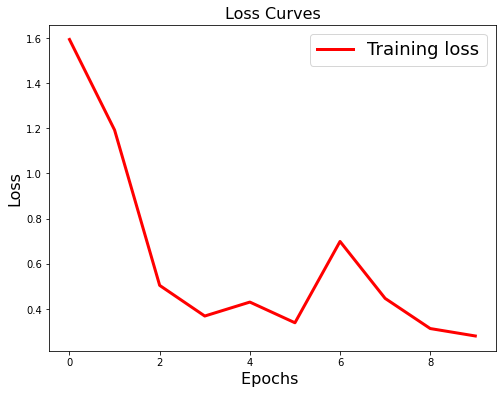

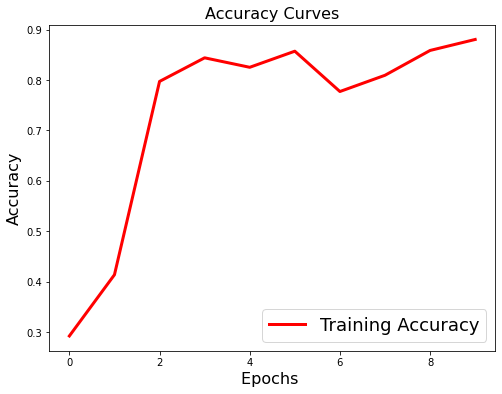

In [ ]:
import matplotlib.pyplot as plt
#Plot the Graph

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
#plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves

plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
#plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

precision=precision_score(y_pred,validation_dataset.classes,average=None)
print(precision)
recall=recall_score(y_pred,validation_dataset.classes,average=None)
print(recall)
f1=f1_score(y_pred,validation_dataset.classes,average=None)
print(recall)

[0.25327511 0.34099617 0.16666667 0.2887931 ]
[0.27102804 0.33712121 0.15322581 0.28632479]
[0.27102804 0.33712121 0.15322581 0.28632479]
